In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning"

/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning


In [ ]:
import numpy as np

In [ ]:
import os

Text(0.5, 1.0, 'normal')

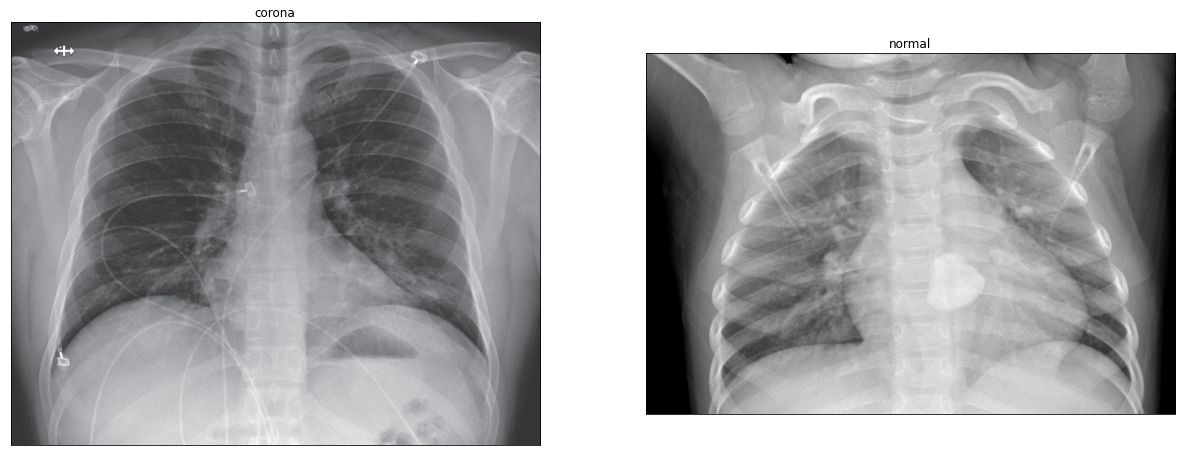

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(55,45))
path = '/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning/dataset/train/corona'
name = os.listdir(path)[1]
img = Image.open(path+"/"+name)
ax = fig.add_subplot(1, 5,  1, xticks=[], yticks=[])
ax.imshow(img, cmap='gray')
ax.set_title('corona')

path2 = '/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning/dataset/train/normal'
name2 = os.listdir(path2)[1]
img2 = Image.open(path2+"/"+name2)
ax = fig.add_subplot(1, 5,  2, xticks=[], yticks=[])
ax.imshow(img2, cmap='gray')
ax.set_title('normal')

In [ ]:
import random

path = '/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning/dataset/train/corona'
li = os.listdir(path)
sizes = list()
for i in range(10):
    num = random.randint(0, len(li)-1)
    name = li[num]
    img = Image.open(path+"/"+name)
    sizes.append(img.size)

sizes

[(1300, 1343),
 (2386, 1835),
 (999, 816),
 (1024, 842),
 (1645, 1272),
 (1404, 1412),
 (1652, 1308),
 (1169, 1094),
 (1992, 1285),
 (880, 874)]

In [ ]:
!wget https://raw.githubusercontent.com/Iamsdt/DLProjects/master/utils/Helper.py

--2020-05-06 08:41:01--  https://raw.githubusercontent.com/Iamsdt/DLProjects/master/utils/Helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21413 (21K) [text/plain]
Saving to: ‘Helper.py’

Helper.py           100%[===================>]  20.91K  --.-KB/s    in 0.002s  

2020-05-06 08:41:01 (13.4 MB/s) - ‘Helper.py’ saved [21413/21413]



In [ ]:
!wget https://raw.githubusercontent.com/LiyuanLucasLiu/RAdam/master/cifar_imagenet/utils/radam.py

--2020-05-06 08:41:07--  https://raw.githubusercontent.com/LiyuanLucasLiu/RAdam/master/cifar_imagenet/utils/radam.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10220 (10.0K) [text/plain]
Saving to: ‘radam.py’

radam.py            100%[===================>]   9.98K  --.-KB/s    in 0.001s  

2020-05-06 08:41:07 (9.23 MB/s) - ‘radam.py’ saved [10220/10220]



In [ ]:
import Helper
import torch
from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader

batch_size = 8
data_dir = '/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning/dataset'

transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(280),
                                transforms.ToTensor(),
#                               transforms.Normalize(mean, std)
])

data = datasets.ImageFolder(data_dir, transform=transform)
print(len(data))
loader = DataLoader(
    data, batch_size=batch_size)

len(loader)

192


24

In [ ]:
mean = 0.
std = 0.
nb_samples = 0.

for images, _ in loader:
    batch_samples = images.size(0)
    data = images.view(batch_samples, images.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples
    break

mean /= nb_samples
std /= nb_samples

print("Mean: ", mean.numpy())
print("Std: ",std.numpy())

Mean:  [0.47653946 0.47653946 0.47653946]
Std:  [0.27055818 0.27055818 0.27055818]


In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/Corona_Federated_learning/dataset'

#mean = [0.485, 0.450, 0.406]
#std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([      
    transforms.Resize(256),                             
    transforms.CenterCrop(270),
    #transforms.RandomRotation(10),                             
    transforms.RandomHorizontalFlip(),                             
    transforms.ToTensor(),                             
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(280),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)
])
train_data = datasets.ImageFolder(data_dir+"/train", transform=train_transform)
test_data = datasets.ImageFolder(data_dir+"/test", transform=test_transform)

classes = train_data.classes
print(classes)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8)

print(len(train_loader))
print(len(test_loader))

['corona', 'normal']
20
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


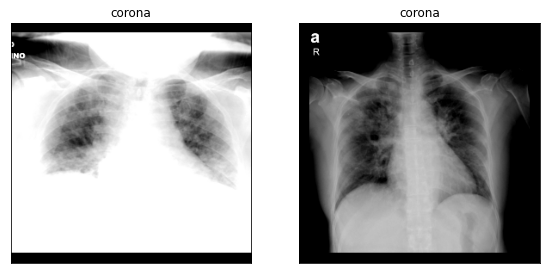

In [ ]:
Helper.visualize(test_loader, classes)

In [ ]:
model = models.resnet101(pretrained=True)
model.fc


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
import torch.nn.functional as F

def milan(input, beta=-0.25):
    '''
    Applies the Mila function element-wise:
    Mila(x) = x * tanh(softplus(1 + β)) = x * tanh(ln(1 + exp(x+β)))
    See additional documentation for mila class.
    '''
    return input * torch.tanh(F.softplus(input+beta))

In [ ]:
import torch.nn as nn
from collections import OrderedDict

class mila(nn.Module):
    '''
    Applies the Mila function element-wise:
    Mila(x) = x * tanh(softplus(1 + β)) = x * tanh(ln(1 + exp(x+β)))
    Shape:
        - Input: (N, *) where * means, any number of additional
          dimensions
        - Output: (N, *), same shape as the input
    Examples:
        >>> m = mila(beta=1.0)
        >>> input = torch.randn(2)
        >>> output = m(input)
    '''
    def __init__(self, beta=-0.25):
        '''
        Init method.
        '''
        super().__init__()
        self.beta = beta
        
    def forward(self, input):
        '''
        Forward pass of the function.
        '''
        return milan(input, self.beta)

In [ ]:
classifier = nn.Sequential(
    nn.Linear(in_features=2048, out_features=1536),
    mila(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1536, out_features=1024),
    mila(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1024, out_features=2),
    nn.LogSoftmax(dim=1)
)
    
model.fc = classifier
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=1536, bias=True)
  (1): mila()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=1536, out_features=1024, bias=True)
  (4): mila()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=1024, out_features=2, bias=True)
  (7): LogSoftmax()
)

In [ ]:
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torch.optim as optim
import torch
import radam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
#optimizer = radam.RAdam(model.parameters(), lr=0.0001)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.01)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
epoch = 2

In [ ]:
model, train_loss, test_loss = Helper.train(model, train_loader, test_loader, epoch, optimizer, criterion, None)

Epoch: 1/2
		Going for validation
	Train loss:0.688461.. 	Valid Loss:0.694018.. 	Accuracy: 56.2500
	Validation loss decreased (inf --> 0.694018).  Saving model ...
	Epoch:1 completed in 0m 44s
Epoch: 2/2
		Going for validation
	Train loss:0.689091.. 	Valid Loss:0.692621.. 	Accuracy: 50.0000
	Validation loss decreased (0.694018 --> 0.692621).  Saving model ...
	Epoch:2 completed in 0m 12s
Training completed in 0m 57s


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from torchvision.utils import save_image

TypeError: ignored

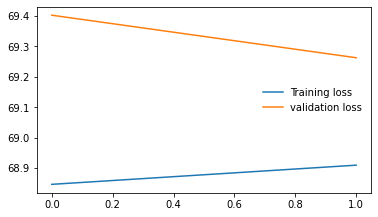

In [ ]:
Helper.check_overfitted(train_loss, test_loss)

In [ ]:
Helper.test_per_class(model, test_loader, criterion, classes)

Test Loss: 0.673882

Test Accuracy of     0: 100% ( 7/ 7)
Test Accuracy of     1: 85% ( 6/ 7)

Test Accuracy (Overall): 92% (13/14)


In [ ]:
Helper.test(model, test_loader, criterion)

Test Loss:1.347763 
Accuracy: 93.7500


In [ ]:
from PIL import Image

transform = transforms.Compose([
                                transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

def test(file):
    ids = train_loader.dataset.class_to_idx
    file = Image.open(file).convert('RGB') 
    img = transform(file).unsqueeze(0)
    with torch.no_grad():
        out = model(img.to(device))
        ps = torch.exp(out)
        top_p, top_class = ps.topk(1, dim=1)
        value = top_class.item()
        print("Value:", value)
        print(classes[value])
        plt.imshow(np.array(file))
        plt.show()

In [ ]:
Helper.test_per_class(model, test_loader, criterion, classes)

Test Loss: 0.673882

Test Accuracy of     0: 100% ( 7/ 7)
Test Accuracy of     1: 85% ( 6/ 7)

Test Accuracy (Overall): 92% (13/14)


In [ ]:
Helper.test(model, test_loader, criterion)

Test Loss:1.347763 
Accuracy: 93.7500
